**1. VARIABLE RANKING BY LINEAR CORRELATION COEFFICIENT**

Download the Leaf dataset from the UCI repository:
http://archive.ics.uci.edu/ml/datasets/Leaf

Rank the importance of the variables for classifying the species according with their linear correlation coefficient.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv("../data_UL/leaf/leaf.csv")
data.iloc[50:56,:]


,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
50,5,12,0.82135,1.6035,0.60250,0.84981,0.87544,0.31304,0.056079,0.57236,0.069239,0.163190,0.025940,0.009292,0.000321,1.46860
51,6,1,0.46348,1.0544,0.72231,0.63754,0.47544,0.20039,0.148640,4.02120,0.010917,0.053494,0.002853,0.000875,0.000030,0.53199
52,6,2,0.50784,1.0544,0.62300,0.73625,0.59649,0.27687,0.132960,3.21760,0.014816,0.067044,0.004475,0.001374,0.000038,0.52114
53,6,3,0.47728,1.2115,0.68343,0.76364,0.56667,0.23896,0.107470,2.10220,0.024036,0.080623,0.006458,0.001831,0.000106,0.90702
54,6,4,0.52744,1.0419,0.51662,0.77201,0.84211,0.33784,0.114380,2.38110,0.025400,0.082047,0.006687,0.001798,0.000122,0.94400
55,6,5,0.50964,1.2067,0.70618,0.72175,0.56491,0.21009,0.112640,2.30930,0.021181,0.080306,0.006408,0.002032,0.000066,0.73274


In [16]:
# import data
cols = ["species", "specimen_number", "eccentricity", "aspect_ratio", "elongation", "solidity", 
           "stochastic_convexity", "isoperimetric_factor", "max_indent_depth", "lobedness", 
           "avg_intensity", "avg_contrast", "smoothness", "third_moment", "uniformity", "entropy"]
leaves_df = pd.read_csv("../data_UL/leaf/leaf.csv", names=cols)
leaves_df.head()

,species,specimen_number,eccentricity,aspect_ratio,elongation,solidity,stochastic_convexity,isoperimetric_factor,max_indent_depth,lobedness,avg_intensity,avg_contrast,smoothness,third_moment,uniformity,entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [17]:
# define function to compute linear correlation coefficient
def linear_correlation(col1, col2):
    d1 = col1 - np.mean(col1)
    d2 = col2 - np.mean(col2)
    v1 = np.sum(np.square(d1))
    v2 = np.sum(np.square(d2))
    cov = np.sum(np.multiply(d1,d2))
    return cov/np.sqrt(v1*v2)

In [21]:
leaves_df['new_species'] = -3*(leaves_df['species'])**3
leaves_df.head()


,species,specimen_number,eccentricity,aspect_ratio,elongation,solidity,stochastic_convexity,isoperimetric_factor,max_indent_depth,lobedness,avg_intensity,avg_contrast,smoothness,third_moment,uniformity,entropy,new_species
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,-3
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,-3
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,-3
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,-3
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214,-3


In [22]:
# check agreement with numpy value (up to machine precision)
print(f"Manual new data implementation: {linear_correlation(leaves_df['new_species'], leaves_df['eccentricity'])}")

print(f"Manual implementation: {linear_correlation(leaves_df['species'], leaves_df['eccentricity'])}")
print(f"Numpy implementation:  {np.corrcoef(leaves_df['species'], leaves_df['eccentricity'])[0][1]}")

Manual new data implementation: -0.1346368888730508
Manual implementation: 0.09141460302089632
Numpy implementation:  0.09141460302089631


**2. VARIABLE RANKING BY MUTUAL INFORMATION**

Download the Congressional Voting Records Data Set
http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

And rank the importance of the variables for classifying the party of vote according with the mutual information criteria.

In [4]:
data2=pd.read_csv("../data_UL/congres/house-votes-84.data")
#data.iloc[50:56,:]
data2.head(5)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [5]:
cols_congres = ["Class Name","handicapped-infants","water-project-cost-sharing","adoption-of-the-budget-resolution",
                "physician-fee-freeze","el-salvador-aid","religious-groups-in-schools","anti-satellite-test-ban",
                "aid-to-nicaraguan-contras","mx-missile","immigration","synfuels-corporation-cutback",
                "education-spending","superfund-right-to-sue","crime","duty-free-exports",
                "export-administration-act-south-africa"]

data2=pd.read_csv("../data_UL/congres/house-votes-84.data", names = cols_congres)
#data.iloc[50:56,:]
data2.head(5)

cols_congres[0]


'Class Name'

In [6]:
# define function to compute mutual information
def mutual_info(col1, col2):
    result = 0 
    for i in col1.unique():
        for j in col2.unique():
            df = pd.concat([col1,col2], axis = 1)
            relevent_line = df[(df[col1.name] == i) & (df[col2.name] == j)]
            num_relevant_line = relevent_line.count()
            joint_probability = num_relevant_line/col1.count()
            next_line = df[(df[col1.name] == i)]
            prob_i = next_line.count()/col1.count()
            next2_line = df[(df[col2.name] == j)]
            prob_j = next2_line.count()/col2.count()
            result1 = joint_probability * np.log(joint_probability/(prob_i*prob_j))
            result = result+result1 
    return result[0]

In [7]:
list1=[]
for i in range(len(cols_congres)):
   list1=list1+[(mutual_info(data2[cols_congres[0]], data2[cols_congres[i]]))]
#list1.sort()
print(list1)

/Users/zainabnazari/opt/miniconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[nan, 0.08738722927832451, 0.00024996231558368576, 0.29966050855502235, 0.5129515491210119, 0.292820363908198, 0.10205527995633651, 0.13702350844932737, 0.23582647275244228, 0.21526164558528296, 0.003522481150227346, 0.07436909386118576, 0.25941112399790134, 0.15789963958281852, 0.232400928863132, 0.15277113756241903, 0.07068655457934098]


In [9]:
dataf = pd.DataFrame(list(zip(cols_congres, list1)), columns=['cols_congres', 'list1'])
dataf

,cols_congres,list1
0,Class Name,NaN
1,handicapped-infants,0.087387
2,water-project-cost-sharing,0.000250
3,adoption-of-the-budget-resolution,0.299661
4,physician-fee-freeze,0.512952
5,el-salvador-aid,0.292820
6,religious-groups-in-schools,0.102055
7,anti-satellite-test-ban,0.137024
8,aid-to-nicaraguan-contras,0.235826
9,mx-missile,0.215262


In [12]:
sorted_df=dataf.sort_values(by=['list1'])

<AxesSubplot:xlabel='cols_congres'>

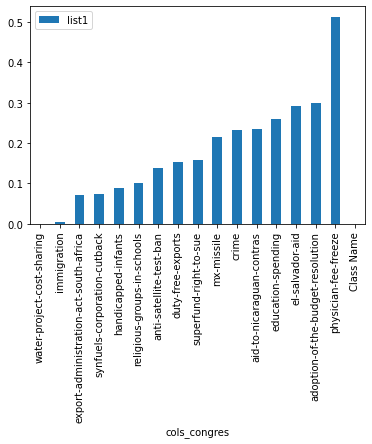

In [13]:
sorted_df.plot(kind='bar',x='cols_congres',y='list1')

**3. PCA.**

Program a PCA and use it to analyze the dataset for radar returns from the ionosphere.
http://archive.ics.uci.edu/ml/datasets/Ionosphere

**4. DISTANCES AND SIMILARITIES**

Program and compute the Mahalanobis distance for the leaf dataset using the coordinates selected in Point 1.

Program and compute the Euclidean distance in the PCA space between the entries in the ionosphere data set.

Program and compute the Hamming distance for the Voting records dataset